In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [9]:
lake_worth = df.loc[df['zipcode'] == '37207']

In [10]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
1835,74238,37207,Nashville,TN,Nashville,Davidson,1836,63600.0,63600.0,63600.0,...,180700,184200,186700,188000,189500,191400,193900,197600,200800,146.683047


In [11]:
lake_worth = lake_worth.iloc[:,7:-1]

In [12]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1835,63600.0,63600.0,63600.0,63700.0,64000.0,64300.0,64800.0,65400.0,66000.0,66700.0,...,177300,180700,184200,186700,188000,189500,191400,193900,197600,200800


In [13]:
lake_worth = lake_worth.T

In [14]:
lake_worth.head()

,1835
1996-04,63600.0
1996-05,63600.0
1996-06,63600.0
1996-07,63700.0
1996-08,64000.0


In [15]:
type(lake_worth)

pandas.core.frame.DataFrame

In [16]:
lake_worth = lake_worth.rename(columns={1835:'home price'})

In [17]:
lake_worth.head()

,home price
1996-04,63600.0
1996-05,63600.0
1996-06,63600.0
1996-07,63700.0
1996-08,64000.0


In [18]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [19]:
lake_worth.index.dtype

dtype('<M8[ns]')

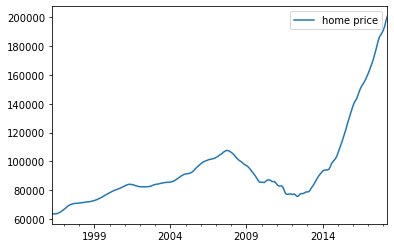

In [20]:
lake_worth.plot();

In [21]:
lake_worth['diff'] = lake_worth.diff()

In [22]:
lake_worth.head()

,home price,diff
1996-04-01,63600.0,NaN
1996-05-01,63600.0,0.0
1996-06-01,63600.0,0.0
1996-07-01,63700.0,100.0
1996-08-01,64000.0,300.0


In [23]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [24]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,189500.0,1500.0,188000.0
2018-01-01,191400.0,1900.0,189500.0
2018-02-01,193900.0,2500.0,191400.0
2018-03-01,197600.0,3700.0,193900.0
2018-04-01,200800.0,3200.0,197600.0


In [25]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [26]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,63600.0,NaN,NaN,NaN
1996-05-01,63600.0,0.0,63600.0,0.000000
1996-06-01,63600.0,0.0,63600.0,0.000000
1996-07-01,63700.0,100.0,63600.0,0.001572
1996-08-01,64000.0,300.0,63700.0,0.004710


In [27]:
lake_worth = lake_worth.dropna()

In [28]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-05-01,63600.0,0.0,63600.0,0.000000
1996-06-01,63600.0,0.0,63600.0,0.000000
1996-07-01,63700.0,100.0,63600.0,0.001572
1996-08-01,64000.0,300.0,63700.0,0.004710
1996-09-01,64300.0,300.0,64000.0,0.004687


In [29]:
lake_worth_pct = lake_worth.drop(['pct','diff','home price shifted'],axis=1)

In [30]:
lake_worth_pct.head()

,home price
1996-05-01,63600.0
1996-06-01,63600.0
1996-07-01,63700.0
1996-08-01,64000.0
1996-09-01,64300.0


In [31]:
lake_worth_pct = lake_worth_pct['2013-04':]

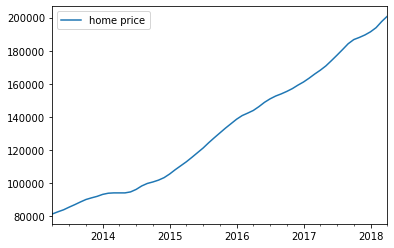

In [32]:
lake_worth_pct.plot();

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
adfuller(lake_worth_pct)

(1.2752625973816063,
 0.9964667733965205,
 7,
 53,
 {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 723.9726757593892)

In [35]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
cutoff = '2017-05'
train = lake_worth_pct[:cutoff]
test = lake_worth_pct[cutoff:]

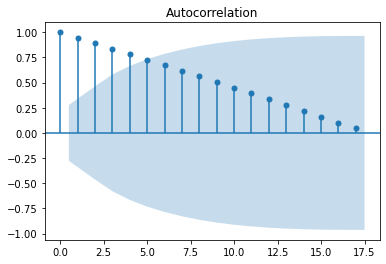

In [37]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

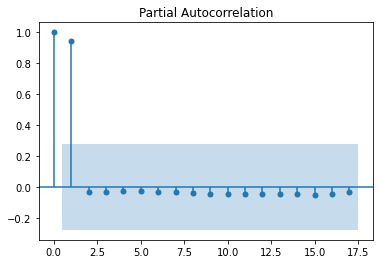

In [38]:
plot_pacf(train,method='ywm');

In [49]:
ar_1 = ARIMA(train, order=(0, 2, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

12971.843513624302

In [51]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             home price   No. Observations:                   50
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -353.781
Date:                Wed, 29 Mar 2023   AIC                            709.562
Time:                        20:52:50   BIC                            711.433
Sample:                    04-01-2013   HQIC                           710.269
                         - 05-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.475e+05   3.66e+04      4.032      0.000    7.58e+04    2.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.24   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.02   Prob(JB):                         0.61
Heteroskedasticity (H):               0.84   Skew:                             0.08
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

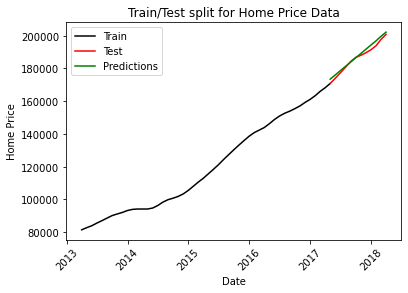

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Home Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Home Price Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();